# Urban canyon study

This example shows the behavior of sparrowpy in the simulation of an urban canyon under different simulation conditions

In [1]:
"""Test the radiosity.Radiosity module."""
import pyfar as pf
import sparrowpy as sp
import matplotlib.pyplot as plt
from run_simu import run_simu, run_simu_mem
import psutil
import numpy as np

%load_ext memory_profiler

%matplotlib inline
# %matplotlib ipympl

Lets define our room and source position.

In [2]:
def urban_canyon_stub(length_x, length_y, length_z):
    """Create a shoebox room with the given dimensions.

    Parameters
    ----------
    length_x : float
        Length of the urban canyon in meters.
    length_y : float
        width of the urban canyon in meters.
    length_z : float
        height of the urban canyon in meters.

    Returns
    -------
    room : list[geo.Polygon]
        List of the walls of the room.

    """
    return [
        sp.geometry.Polygon(
            [[0, 0, 0], [length_x, 0, 0],
            [length_x, 0, length_z], [0, 0, length_z]],
            [0, 0, 1], [0, 1, 0]),
        sp.geometry.Polygon(
            [[0, 0, 0],[0, length_y, 0],
            [length_x, length_y, 0], [length_x, 0, 0 ]],
            [1, 0, 0], [0, 0, 1]),
        sp.geometry.Polygon(
            [[0, length_y, 0], [length_x, length_y, 0],
            [length_x, length_y, length_z], [0, length_y, length_z]],
            [0, 0, 1], [0, -1, 0]),
        ]

In [3]:
# Define parameters
X = 80
Y = 8
Z = 16

# create geometry
canyon = urban_canyon_stub(X, Y, Z)
source = pf.Coordinates(35, 5, 1)
receiver = pf.Coordinates(45, 2, 1.7)

In [4]:
run_simu(walls=urban_canyon_stub(1,1,1),
        source=pf.Coordinates(.5,.5,.5),
        receiver=pf.Coordinates(.5,.5,.5),
        patch_size=.5)

d:\Joao_Fatela\dev\sparrowpy\examples\run_simu.py:75: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(


TimeData:
(1, 1) channels with 5 samples

### run simulation

In [5]:
etc = run_simu( walls=canyon, source=source,
                receiver=receiver, patch_size=8,
                time_step=.002, duration=1.2,
                refl_order=50)

In [6]:
#snapshot = tracemalloc.take_snapshot()
for pat in [8,4,8,4,2]:
    etc,mem = run_simu_mem( walls=canyon, source=source,
                    receiver=receiver, patch_size=4,
                    time_step=.002, duration=1.2,
                    refl_order=50)
    l=["start","scene","prop","baking","cast","exch","collect","total"]
    for i in range(len(mem)):
        print(f'{l[i]}: {mem[i]}')
    print()
    print(np.sum(mem[1:len(mem)-1])-mem[-1])
    print("\n\n\n\n")

d:\Joao_Fatela\dev\sparrowpy\examples\run_simu.py:27: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(


start: 405.1796875
scene: 0.00390625
prop: 0.00390625
baking: 0.03515625
cast: 0.01171875
exch: 1.9375
collect: 1.8515625
total: 3.7890625

0.0546875





start: 408.96875
scene: 0.0
prop: 0.0
baking: 0.17578125
cast: 0.0
exch: 0.2578125
collect: 0.00390625
total: 0.26171875

0.17578125





start: 409.23046875
scene: 0.0
prop: 0.0
baking: 0.00390625
cast: 0.01171875
exch: -0.015625
collect: 0.01171875
total: -0.00390625

0.015625





start: 409.2265625
scene: 0.0
prop: 0.0
baking: 0.03125
cast: 0.0
exch: 0.03125
collect: 0.0
total: 0.03125

0.03125







KeyboardInterrupt: 

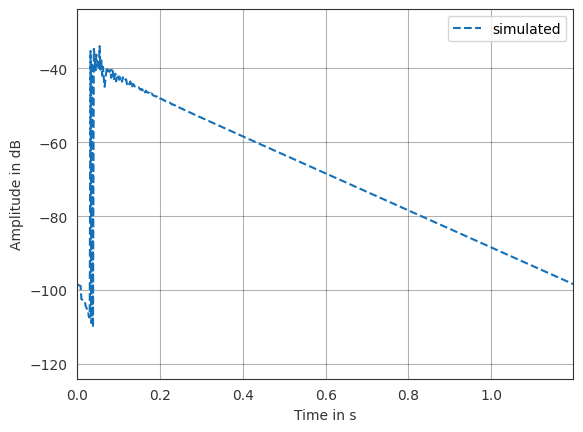

In [ ]:
plt.figure()

pf.plot.time(
    etc, dB=True, log_prefix=10,
    label='simulated',
    linestyle='--')

plt.legend()
plt.show()

If the order would be increased, this would match even after 0.5s.


In [ ]:
%load_ext watermark
%watermark -v -m -iv

Python implementation: CPython
Python version       : 3.11.9
IPython version      : 8.31.0

Compiler    : MSC v.1938 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 13, GenuineIntel
CPU cores   : 8
Architecture: 64bit

sparrowpy : 0.1.0
matplotlib: 3.10.0
pyfar     : 0.7.1
psutil    : 6.1.1
numpy     : 1.26.4

